<a href="https://colab.research.google.com/github/SHINE51278/ML/blob/main/Lab_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
df.shape

(270, 14)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['Heart Disease'], dtype='object')

In [ ]:
df.isnull().sum() #Find missing values in each column

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.isnull().values.any() #Row-wise checking of Null value

np.False_

In [ ]:
df[df.isnull().any(axis=1)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.640741,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.189229,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,132.250000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
import numpy as np


In [ ]:
age_array=df['Age'].to_numpy()
age_array

array([70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 59, 53, 44, 61, 57, 71, 46,
       53, 64, 40, 67, 48, 43, 47, 54, 48, 46, 51, 58, 71, 57, 66, 37, 59,
       50, 48, 61, 59, 42, 48, 40, 62, 44, 46, 59, 58, 49, 44, 66, 65, 42,
       52, 65, 63, 45, 41, 61, 60, 59, 62, 57, 51, 44, 60, 63, 57, 51, 58,
       44, 47, 61, 57, 70, 76, 67, 45, 45, 39, 42, 56, 58, 35, 58, 41, 57,
       42, 62, 59, 41, 50, 59, 61, 54, 54, 52, 47, 66, 58, 64, 50, 44, 67,
       49, 57, 63, 48, 51, 60, 59, 45, 55, 41, 60, 54, 42, 49, 46, 56, 66,
       56, 49, 54, 57, 65, 54, 54, 62, 52, 52, 60, 63, 66, 42, 64, 54, 46,
       67, 56, 34, 57, 64, 59, 50, 51, 54, 53, 52, 40, 58, 41, 41, 50, 54,
       64, 51, 46, 55, 45, 56, 66, 38, 62, 55, 58, 43, 64, 50, 53, 45, 65,
       69, 69, 67, 68, 34, 62, 51, 46, 67, 50, 42, 56, 41, 42, 53, 43, 56,
       52, 62, 70, 54, 70, 54, 35, 48, 55, 58, 54, 69, 77, 68, 58, 60, 51,
       55, 52, 60, 58, 64, 37, 59, 51, 43, 58, 29, 41, 63, 51, 54, 44, 54,
       65, 57, 63, 35, 41

In [ ]:
mean_age=np.mean(age_array)
meadian_age=np.median(age_array)
std_age=np.std(age_array)
print (mean_age, ',', meadian_age, ',', std_age)

54.43333333333333 , 55.0 , 9.092182234083177


In [ ]:
cholesterol_array=df['Cholesterol'].to_numpy()
cholesterol_array

array([322, 564, 261, 263, 269, 177, 256, 239, 293, 407, 234, 226, 235,
       234, 303, 149, 311, 203, 211, 199, 229, 245, 303, 204, 288, 275,
       243, 295, 230, 265, 229, 228, 215, 326, 200, 256, 207, 273, 180,
       222, 223, 209, 233, 197, 218, 211, 149, 197, 246, 225, 315, 205,
       417, 195, 234, 198, 166, 178, 249, 281, 126, 305, 226, 240, 233,
       276, 261, 319, 242, 243, 260, 354, 245, 197, 223, 309, 208, 199,
       209, 236, 218, 198, 270, 214, 201, 244, 208, 270, 306, 243, 221,
       330, 266, 206, 212, 275, 302, 234, 313, 244, 141, 237, 269, 289,
       254, 274, 222, 258, 177, 160, 327, 235, 305, 304, 295, 271, 249,
       288, 226, 283, 188, 286, 274, 360, 273, 201, 267, 196, 201, 230,
       269, 212, 226, 246, 232, 177, 277, 249, 210, 207, 212, 271, 233,
       213, 283, 282, 230, 167, 224, 268, 250, 219, 267, 303, 256, 204,
       217, 308, 193, 228, 231, 244, 262, 259, 211, 325, 254, 197, 236,
       282, 234, 254, 299, 211, 182, 294, 298, 231, 254, 196, 24

In [ ]:
max_cholestol=np.max(cholesterol_array)
min_cholestol=np.min(cholesterol_array)

print (max_cholestol, ',', min_cholestol)

564 , 126


In [ ]:
count_hd = df['Heart Disease'].value_counts()
count_hd

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
import matplotlib.pyplot as plt


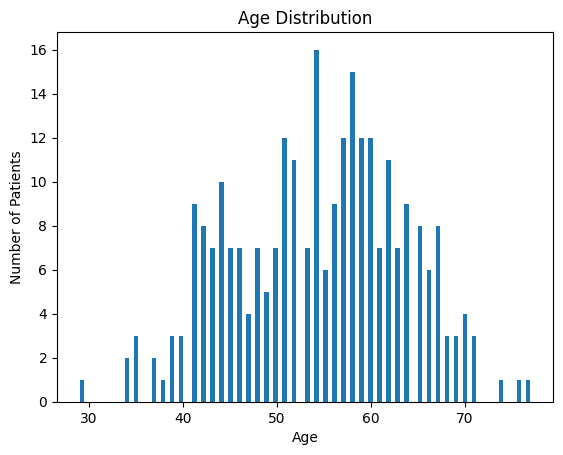

In [ ]:
plt.hist(age_array, bins=100)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution')
plt.show()

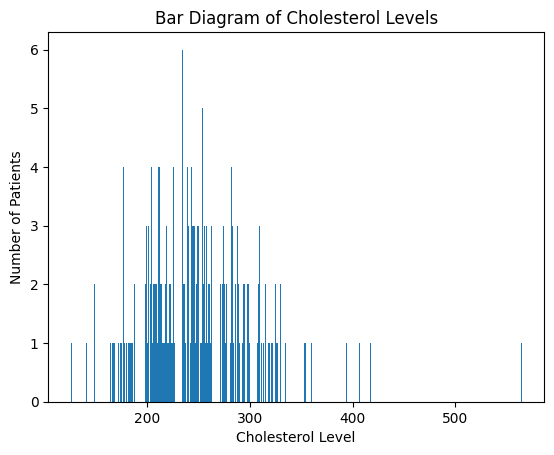

In [ ]:
values, counts = np.unique(cholesterol_array, return_counts=True)

plt.bar(values, counts)
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')
plt.title('Bar Diagram of Cholesterol Levels')
plt.show()

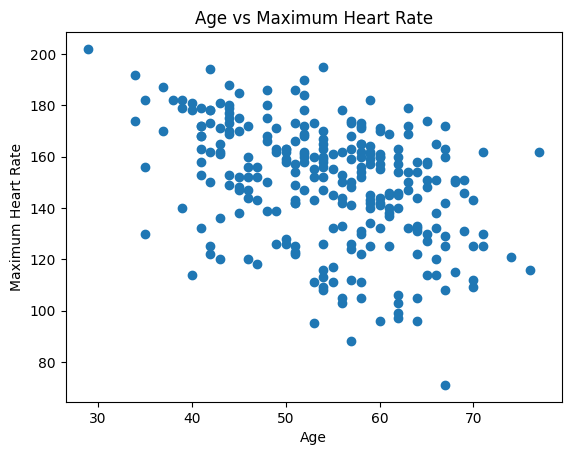

In [ ]:
plt.scatter(df['Age'], df['Max HR'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Age vs Maximum Heart Rate')
plt.show()

In [ ]:
# CORRELATION MATRIX

In [ ]:
df_new = df.drop(['Heart Disease'], axis=1)
df_new


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
correlation_matrix = df_new.corr()
correlation_matrix

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.403667,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.077128,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.318754,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.038078,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.016467,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.023139,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.072910,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.403667,-0.077128,-0.318754,-0.038078,-0.016467,0.023139,-0.072910,1.000000,-0.379211,-0.347782,-0.384928,-0.263925,-0.255043
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.379211,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.347782,0.274672,1.000000,0.609712,0.255005,0.324333


In [ ]:
correlation_matrix.round(2)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.00,-0.09,0.10,0.27,0.22,0.12,0.13,-0.40,0.10,0.19,0.16,0.36,0.11
Sex,-0.09,1.00,0.03,-0.06,-0.20,0.04,0.04,-0.08,0.18,0.10,0.05,0.09,0.39
Chest pain type,0.10,0.03,1.00,-0.04,0.09,-0.10,0.07,-0.32,0.35,0.17,0.14,0.23,0.26
BP,0.27,-0.06,-0.04,1.00,0.17,0.16,0.12,-0.04,0.08,0.22,0.14,0.09,0.13
Cholesterol,0.22,-0.20,0.09,0.17,1.00,0.03,0.17,-0.02,0.08,0.03,-0.01,0.13,0.03
FBS over 120,0.12,0.04,-0.10,0.16,0.03,1.00,0.05,0.02,-0.00,-0.03,0.04,0.12,0.05
EKG results,0.13,0.04,0.07,0.12,0.17,0.05,1.00,-0.07,0.10,0.12,0.16,0.11,0.01
Max HR,-0.40,-0.08,-0.32,-0.04,-0.02,0.02,-0.07,1.00,-0.38,-0.35,-0.38,-0.26,-0.26
Exercise angina,0.10,0.18,0.35,0.08,0.08,-0.00,0.10,-0.38,1.00,0.27,0.26,0.15,0.32
ST depression,0.19,0.10,0.17,0.22,0.03,-0.03,0.12,-0.35,0.27,1.00,0.61,0.26,0.32


In [ ]:
high_corr = correlation_matrix.abs() > 0.8
high_corr

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,True,False,False,False,False,False,False,False,False,False,False,False,False
Sex,False,True,False,False,False,False,False,False,False,False,False,False,False
Chest pain type,False,False,True,False,False,False,False,False,False,False,False,False,False
BP,False,False,False,True,False,False,False,False,False,False,False,False,False
Cholesterol,False,False,False,False,True,False,False,False,False,False,False,False,False
FBS over 120,False,False,False,False,False,True,False,False,False,False,False,False,False
EKG results,False,False,False,False,False,False,True,False,False,False,False,False,False
Max HR,False,False,False,False,False,False,False,True,False,False,False,False,False
Exercise angina,False,False,False,False,False,False,False,False,True,False,False,False,False
ST depression,False,False,False,False,False,False,False,False,False,True,False,False,False
